# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as fs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

## Regression Model Evaluation

In [54]:
from sklearn.datasets import load_boston

data = load_boston()

x = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([x, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [55]:
x_test, x_train, y_test, y_train = train_test_split(x,y,  test_size=0.20)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [56]:
model_lr= lr()
model_lr.fit(x_train, y_train)
train_score = model_lr.score(x_train,y_train)
test_score = model_lr.score(x_test,y_test)
print(train_score, test_score)
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

0.7476675903160642 0.7103026298655741


## 3. Calculate and print R-squared for both the training and the testing set.

In [57]:
r2train = model_lr.score(x_train, y_train)
r2test = model_lr.score(x_test, y_test)
print(r2train)
print(r2test)

0.7476675903160642
0.7103026298655741


In [58]:
print(mse(y_train, y_pred_train))
print(mse(y_test, y_pred_test))

22.156629071447185
24.200495069623443


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [59]:
print(mae(y_train, y_pred_train))
print(mae(y_test, y_pred_test))

3.1712895062477346
3.468714867570819


## Classification Model Evaluation

In [60]:
from sklearn.datasets import load_iris

data = load_iris()

x = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([x, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [72]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='lbfgs')
logr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred_train = logr.predict(x_train)
y_pred_test = logr.predict(x_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [77]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.95
0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [78]:
print(bas(y_train, y_pred_train))
print(bas(y_test, y_pred_test))

0.9472934472934472
0.9696969696969697


## 10. Calculate and print the precision score for both the training and the testing set.

In [80]:
print(ps(y_train, y_pred_train, average='micro'))
print(ps(y_test, y_pred_test, average='micro'))

0.95
0.9666666666666667


## 11. Calculate and print the recall score for both the training and the testing set.

In [82]:
print(rs(y_train, y_pred_train, average='micro'))
print(rs(y_test, y_pred_test, average='micro'))

0.95
0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [84]:
print(fs(y_train, y_pred_train, average='micro'))
print(fs(y_test, y_pred_test, average='micro'))

0.9500000000000001
0.9666666666666667


## 13. Generate confusion matrices for both the training and the testing set.

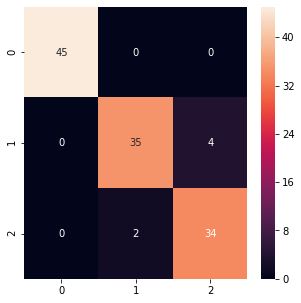

In [90]:
fig, a = plt.subplots(figsize=(5,5))
a = sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
b,c = a.get_ylim()
a.set_ylim(b+.5, c-.5)
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.